# Build Random Wedge Sampler Transform

In [1]:
# use autoreload
%load_ext autoreload
%autoreload 2

import yaml
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader

# import lightning trainer
import lightning as L
from lightning.pytorch.loggers import WandbLogger

# imports
from jepa.modules import JEPA

from toytrack.dataloaders import TracksDataset
from jepa.utils import WedgePatchify

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (dataloaders.py, line 47)

## Wedgify Transform

In [33]:
config = yaml.load(open('configs/12_testing.yaml'), Loader=yaml.FullLoader)

[autoreload of jepa.modules.models.jepa failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/global/cfs/cdirs/m3443/usr/dtmurnane/Side_Work/Particle-JE

In [34]:
patchify = WedgePatchify(phi_range=np.pi / 4, radius_midpoint = (config["dataset_args"]["detector"]["max_radius"] + config["dataset_args"]["detector"]["min_radius"]) / 2)

dataset = TracksDataset(config["dataset_args"], transform=patchify)
dataloader = DataLoader(dataset, batch_size=3, num_workers=0, collate_fn=dataset.collate_fn)

Selected phi: 0.8861
Phi range: [0.4934, 1.2788]
Hits in phi mask: 6
Hits in inner mask: 28
Hits in outer mask: 28
Hits in context mask: 2
Hits in target mask: 4


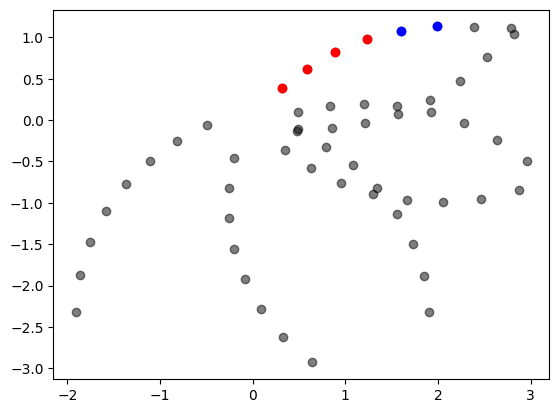

In [35]:
for sample in dataset:
    inner_x = sample["x"][sample["context_mask"]]
    outer_x = sample["x"][sample["target_mask"]]

    plt.scatter(sample["x"][:, 0], sample["x"][:, 1], color="black", alpha=0.5)
    plt.scatter(inner_x[:, 0], inner_x[:, 1], color="blue")
    plt.scatter(outer_x[:, 0], outer_x[:, 1], color="red")
    plt.show()
    break

In [36]:
for sample in dataloader:
    print(sample)
    break

Selected phi: -2.4528
Phi range: [-2.8455, -2.0601]
Hits in phi mask: 15
Hits in inner mask: 36
Hits in outer mask: 36
Hits in context mask: 8
Hits in target mask: 7
Selected phi: -2.1321
Phi range: [-2.5248, -1.7394]
Hits in phi mask: 14
Hits in inner mask: 20
Hits in outer mask: 20
Hits in context mask: 8
Hits in target mask: 6
Selected phi: -3.0843
Phi range: [-3.4770, -2.6916]
Hits in phi mask: 5
Hits in inner mask: 32
Hits in outer mask: 32
Hits in context mask: 3
Hits in target mask: 2
{'x': tensor([[[ 0.1405, -0.4798],
         [ 0.2518, -0.8193],
         [ 0.4103, -1.1429],
         [ 0.6159, -1.4457],
         [ 0.8682, -1.7221],
         [ 1.1668, -1.9655],
         [ 1.5113, -2.1681],
         [ 1.9011, -2.3207],
         [ 0.3913,  0.3112],
         [ 0.5930,  0.6189],
         [ 0.7500,  0.9550],
         [ 0.8583,  1.3163],
         [ 0.9132,  1.6986],
         [ 0.9093,  2.0970],
         [ 0.8401,  2.5058],
         [ 0.6974,  2.9178],
         [-0.0633,  0.4960],
    

## Explore Model Loading

In [3]:
with open("configs/12_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
model = JEPA(**config)


In [5]:
for batch in model.train_dataloader():
    x, mask, context_mask, target_mask, pids = model._extract_batch_data(batch)
    model._debug_batch_shapes(x, mask, context_mask, target_mask, pids)

    break

Batch shapes: x=torch.Size([200, 72, 2]), mask=torch.Size([200, 72]), context_mask=torch.Size([200, 72]), target_mask=torch.Size([200, 72]), pids=torch.Size([200, 72])


## Train Run

In [2]:
with open("configs/12_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
model = JEPA(**config)

In [5]:
wandb_logger = WandbLogger(project="JEPA_toytrack_splitwedges")
trainer = L.Trainer(
    max_epochs=10, 
    devices=1, 
    accelerator="gpu", 
    limit_train_batches = config["train_batches"], 
    limit_val_batches = config["val_batches"],
    logger = wandb_logger,
)
trainer.fit(model=model)

/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /global/homes/d/danieltm/.conda/envs/jepa/lib/python ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/pytorch/loggers/wandb.py:391: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type       | Params
-------------------------------------------
0 | encoder     | Encoder    | 73.3 K
1 | ema_encoder | Encoder 

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]Batch shapes: x=torch.Size([200, 80, 2]), mask=torch.Size([200, 80]), context_mask=torch.Size([200, 80]), target_mask=torch.Size([200, 80]), pids=torch.Size([200, 80])
NaN detected in encoder output
Tensor shape: torch.Size([200, 8])
NaN locations: tensor([[51,  0],
        [51,  1],
        [51,  2],
        [51,  3],
        [51,  4],
        [51,  5],
        [51,  6],
        [51,  7]], device='cuda:0')
Tensor statistics:
  Min: nan
  Max: nan
  Mean: nan
  Std: nan

Batch entry 51 containing NaN:
tensor([nan, nan, nan, nan, nan, nan, nan, nan], device='cuda:0')
x: tensor([[-0.1842, -0.4648],
        [-0.2735, -0.8123],
        [-0.3124, -1.1734],
        [-0.2979, -1.5429],
        [-0.2269, -1.9152],
        [-0.0955, -2.2837],
        [ 0.1006, -2.6409],
        [ 0.3668, -2.9775],
        [-0.4646,  0.1848],
        [-0.8218,  0.2436],
        [-1.1879,  0.2518],
        [-1.5577,  0.2069],
        [-1.9256,  0.

ValueError: NaN detected in encoder output